In [5]:
import json
import os
import re
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import pandas as pd
import glob
%matplotlib inline

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

sns.set(rc={'figure.figsize':(9, 3)})
sns.set_style("whitegrid")
plt.rcParams['figure.dpi'] = 600
BASE_PATH = os.path.abspath(os.path.join(os.getcwd(), os.pardir))

# Load GPU Data

In [6]:

def lines_that_contain(string, fp):
    return [line for line in fp if string in line]

data = []

for app in ["bfs", "gaussian", "hotspot", "myocyte", "pathfinder", "srad-v1"]:
    
    for f in glob.glob(os.path.join(BASE_PATH, f'data/baseline_gpu/{app}/*.out')):
        #print(f)
        with open(f, 'r') as fp:
            line = fp.readline()
            #print(line)
            data.append([app, float(line)])
            #or line in lines_that_contain("in seconds", fp):
            #    size = f.split('_')[-2]
            #    benchmark = f.split('_')[-3]
            #    data.append([p, benchmark, size, float(line.split()[-1])])
#print(data)
gpu_time = pd.DataFrame(data=data, columns=['app', 'time'])
#nas_container['type'] = nas_container.apply(lambda row: f"({row['benchmark'].upper()}, {row['size']})", axis=1)
#nas_container.sort_values(by=['type'], inplace=True)
mean_gpu = gpu_time.groupby(['app']).mean()
dev_gpu = gpu_time.groupby(['app']).std()

print('Mean', mean_gpu)
print('CoV', gpu_time.groupby(['app']).std() / mean_gpu)

Mean                 time
app                 
bfs         1.632161
gaussian    0.288101
hotspot     0.437144
myocyte     0.444882
pathfinder  0.340984
srad-v1     0.176451
CoV                 time
app                 
bfs         0.002082
gaussian    0.079722
hotspot     0.008973
myocyte     0.007055
pathfinder  0.029771
srad-v1     0.049793


# Plot MILC

In [7]:
def barplot_err(x, y, xerr=None, yerr=None, data=None, hue=None, **kwargs):

    y_values = []
    yerr_values = []
    for hue_value in data[hue].unique():
        for x_value in data[x].unique():
            row = data.loc[(data[hue] == hue_value) & (data[x] == x_value)]
            y_values.append(row[y].values[0])
            yerr_values.append(row[yerr].values[0])
        
    _ax = sns.barplot(x=x,y=y,data=data, hue=hue, **kwargs)
    
    x_coords = [p.get_x() + 0.5*p.get_width() for p in _ax.patches]
    y_coords = [p.get_height() for p in ax.patches]

    _, caps,_ = _ax.errorbar(x=x_coords, y=y_coords, yerr=yerr_values, linewidth=2, 
                             solid_capstyle='round', solid_joinstyle='round', color='#464646', fmt="none", capsize=4.5)
    

    for cap in caps:
        cap.set_markeredgewidth(2)
        cap._marker._capstyle = matplotlib._enums.CapStyle.round

    return _ax

In [8]:

def lines_that_start_with(string, fp):
    return [line for line in fp if line.startswith(string)]

data = []

for spread in [11]:
    
    for f in glob.glob(os.path.join(BASE_PATH, f'data/baseline/daint_gpu/milc_32/milc_{spread}/milc_*.out')):

        with open(f, 'r') as fp:
            for line in lines_that_start_with("Elapsed total time", fp):
                #print(line)
                size = int(f.split('_')[-2])
                data.append([11, size, float(line.split()[-1])])
                
lulesh_time = pd.DataFrame(data=data, columns=['spread', 'lulesh_size', 'time'])
normal_lulesh = lulesh_time.loc[lulesh_time['spread'] == 11]
#print(normal_lulesh)

avg_lulesh = normal_lulesh.groupby(['lulesh_size']).mean().reset_index()
median_lulesh = normal_lulesh.groupby(['lulesh_size']).median().reset_index()
dev_lulesh = normal_lulesh.groupby(['lulesh_size']).std().reset_index()
print(avg_lulesh)
print(median_lulesh)

   lulesh_size  spread        time
0           32    11.0   89.199564
1           64    11.0  171.004849
2           96    11.0  235.633898
3          128    11.0  326.827516
   lulesh_size  spread        time
0           32    11.0   89.787031
1           64    11.0  171.862714
2           96    11.0  236.313770
3          128    11.0  327.733923


## Colocated data

In [10]:

def lines_that_start_with(string, fp):
    return [line for line in fp if line.startswith(string)]

data = []

for app in ["bfs", "gaussian", "hotspot", "myocyte", "pathfinder", "srad-v1"]:
    
    for lulesh_size in [32,64,96,128]:
        #print(f'data/colocation_gpu/milc/nas_{lulesh_size}_{app}/milc*.out')
        for f in glob.glob(os.path.join(BASE_PATH, f'data/colocation_gpu/milc/rodinia_{lulesh_size}_{app}/milc*.out')):

            with open(f, 'r') as fp:
                for line in lines_that_start_with("Elapsed total time", fp):
                    data.append([lulesh_size, app, float(line.split()[-1])])

colocated_lulesh = pd.DataFrame(data=data, columns=['lulesh_size', 'app', 'time'])
colocated_lulesh = pd.DataFrame(data=data, columns=['lulesh_size', 'app', 'time'])
print(colocated_lulesh)
#print(lulesh_time.loc[lulesh_time['size'] == 10]['time'])

data = []

for app in ["bfs", "gaussian", "hotspot", "myocyte", "pathfinder", "srad-v1"]:
    
    for lulesh_size in [32,64,96,128]:
        for f in glob.glob(os.path.join(BASE_PATH, f'data/colocation_gpu/milc/rodinia_{lulesh_size}_{app}/{app}*.out')):
            #print(f)
            with open(f, 'r') as fp:
                line = fp.readline()
                if line != "":
                    data.append([lulesh_size, app, float(line)])

colocated_gpu = pd.DataFrame(data=data, columns=['lulesh_size', 'app', 'time'])
print(colocated_gpu)


     lulesh_size      app        time
0             32      bfs   96.154645
1             32      bfs   98.170944
2             32      bfs   96.019950
3             32      bfs   96.979845
4             32      bfs   95.878691
..           ...      ...         ...
278          128  srad-v1  355.547132
279          128  srad-v1  348.204420
280          128  srad-v1  362.258336
281          128  srad-v1  348.632368
282          128  srad-v1  354.301786

[283 rows x 3 columns]
       lulesh_size      app      time
0               32      bfs  1.823417
1               32      bfs  1.817859
2               32      bfs  1.776460
3               32      bfs  1.824041
4               32      bfs  1.818112
...            ...      ...       ...
14990          128  srad-v1  0.185541
14991          128  srad-v1  0.179590
14992          128  srad-v1  0.185901
14993          128  srad-v1  0.184591
14994          128  srad-v1  0.177007

[14995 rows x 3 columns]


In [11]:

mean_colocated_lulesh = colocated_lulesh.groupby(['lulesh_size', 'app']).mean().reset_index()
median_colocated_lulesh = colocated_lulesh.groupby(['lulesh_size', 'app']).median().reset_index()
dev_colocated_lulesh = colocated_lulesh.groupby(['lulesh_size', 'app']).std().reset_index()
mean_lulesh = normal_lulesh.groupby(['lulesh_size']).mean().reset_index()
median_lulesh = normal_lulesh.groupby(['lulesh_size']).median().reset_index()
dev_lulesh = normal_lulesh.groupby(['lulesh_size']).std().reset_index()

mean_colocated_gpu = colocated_gpu.groupby(['lulesh_size', 'app']).mean().reset_index()
median_colocated_gpu = colocated_gpu.groupby(['lulesh_size', 'app']).median().reset_index()
dev_colocated_gpu = colocated_gpu.groupby(['lulesh_size', 'app']).std().reset_index()
mean_gpu = gpu_time.groupby(['app']).mean().reset_index()
median_gpu = gpu_time.groupby(['app']).median().reset_index()
dev_gpu = gpu_time.groupby(['app']).std().reset_index()

print(mean_lulesh)
print(mean_gpu)


print(mean_lulesh)
print(mean_colocated_lulesh)

df1 = mean_colocated_lulesh.set_index('lulesh_size')
df2 = mean_lulesh.set_index('lulesh_size')
df1['original_time'] = df2['time'].reindex(df1.index)
df1['slowdown'] = df1['time'] / df1['original_time']
df1['original_dev'] = dev_lulesh.set_index('lulesh_size')['time'].reindex(df1.index)
df1['dev'] = dev_colocated_lulesh.set_index('lulesh_size')['time'].reindex(df1.index)
df1['slowdown_dev'] = df1['slowdown']*np.sqrt((df1['original_dev'] / df1['original_time'])**2 + (df1['dev'] / df1['time'])**2)

print(df1)

df3 = mean_colocated_gpu.set_index(['app'])
print(df3)
df4 = mean_gpu.set_index(['app'])
print(df4)
df3['original_time'] = df4['time'].reindex(df3.index)
df3['slowdown'] = df3['time'] / df3['original_time']
df3['original_dev'] = dev_gpu.set_index('app')['time'].reindex(df3.index)
df3['dev'] = dev_colocated_gpu.set_index('app')['time'].reindex(df3.index)
df3['slowdown_dev'] = df3['slowdown']*np.sqrt((df3['original_dev'] / df3['original_time'])**2 + (df3['dev'] / df3['time'])**2)
print(df3)

df5 = df1.reset_index().set_index(['app', 'lulesh_size'])
df6 = df3.reset_index().set_index(['app', 'lulesh_size'])
print(df5)
print(df6)

df5['app_slowdown'] = df6['slowdown'].reindex(df5.index)
df5['app_slowdown_dev'] = df6['slowdown_dev'].reindex(df5.index)
print(df5)
df5.reset_index(inplace=True)
#df5.sort_values(by=['type'], inplace=True)
print(df5)

#df5['slowdown'] = (df5['slowdown']-1)*100
#df5['app_slowdown'] = (df5['app_slowdown']-1)*100
df5['rescaled_slowdown'] = (df5['slowdown']-1)*100
df5['rescaled_app_slowdown'] = (df5['app_slowdown']-1)*100
df5['rescaled_slowdown_dev'] = df5['slowdown_dev']*100
df5['rescaled_app_slowdown_dev'] = df5['app_slowdown_dev']*100

   lulesh_size  spread        time
0           32    11.0   89.199564
1           64    11.0  171.004849
2           96    11.0  235.633898
3          128    11.0  326.827516
          app      time
0         bfs  1.632161
1    gaussian  0.288101
2     hotspot  0.437144
3     myocyte  0.444882
4  pathfinder  0.340984
5     srad-v1  0.176451
   lulesh_size  spread        time
0           32    11.0   89.199564
1           64    11.0  171.004849
2           96    11.0  235.633898
3          128    11.0  326.827516
    lulesh_size         app        time
0            32         bfs  100.569011
1            32    gaussian   93.263840
2            32     hotspot   94.371688
3            32     myocyte  103.360674
4            32  pathfinder   91.655815
5            32     srad-v1   99.938833
6            64         bfs  186.770035
7            64    gaussian  190.261859
8            64     hotspot  189.770293
9            64     myocyte  183.295014
10           64  pathfinder  187.678629
11

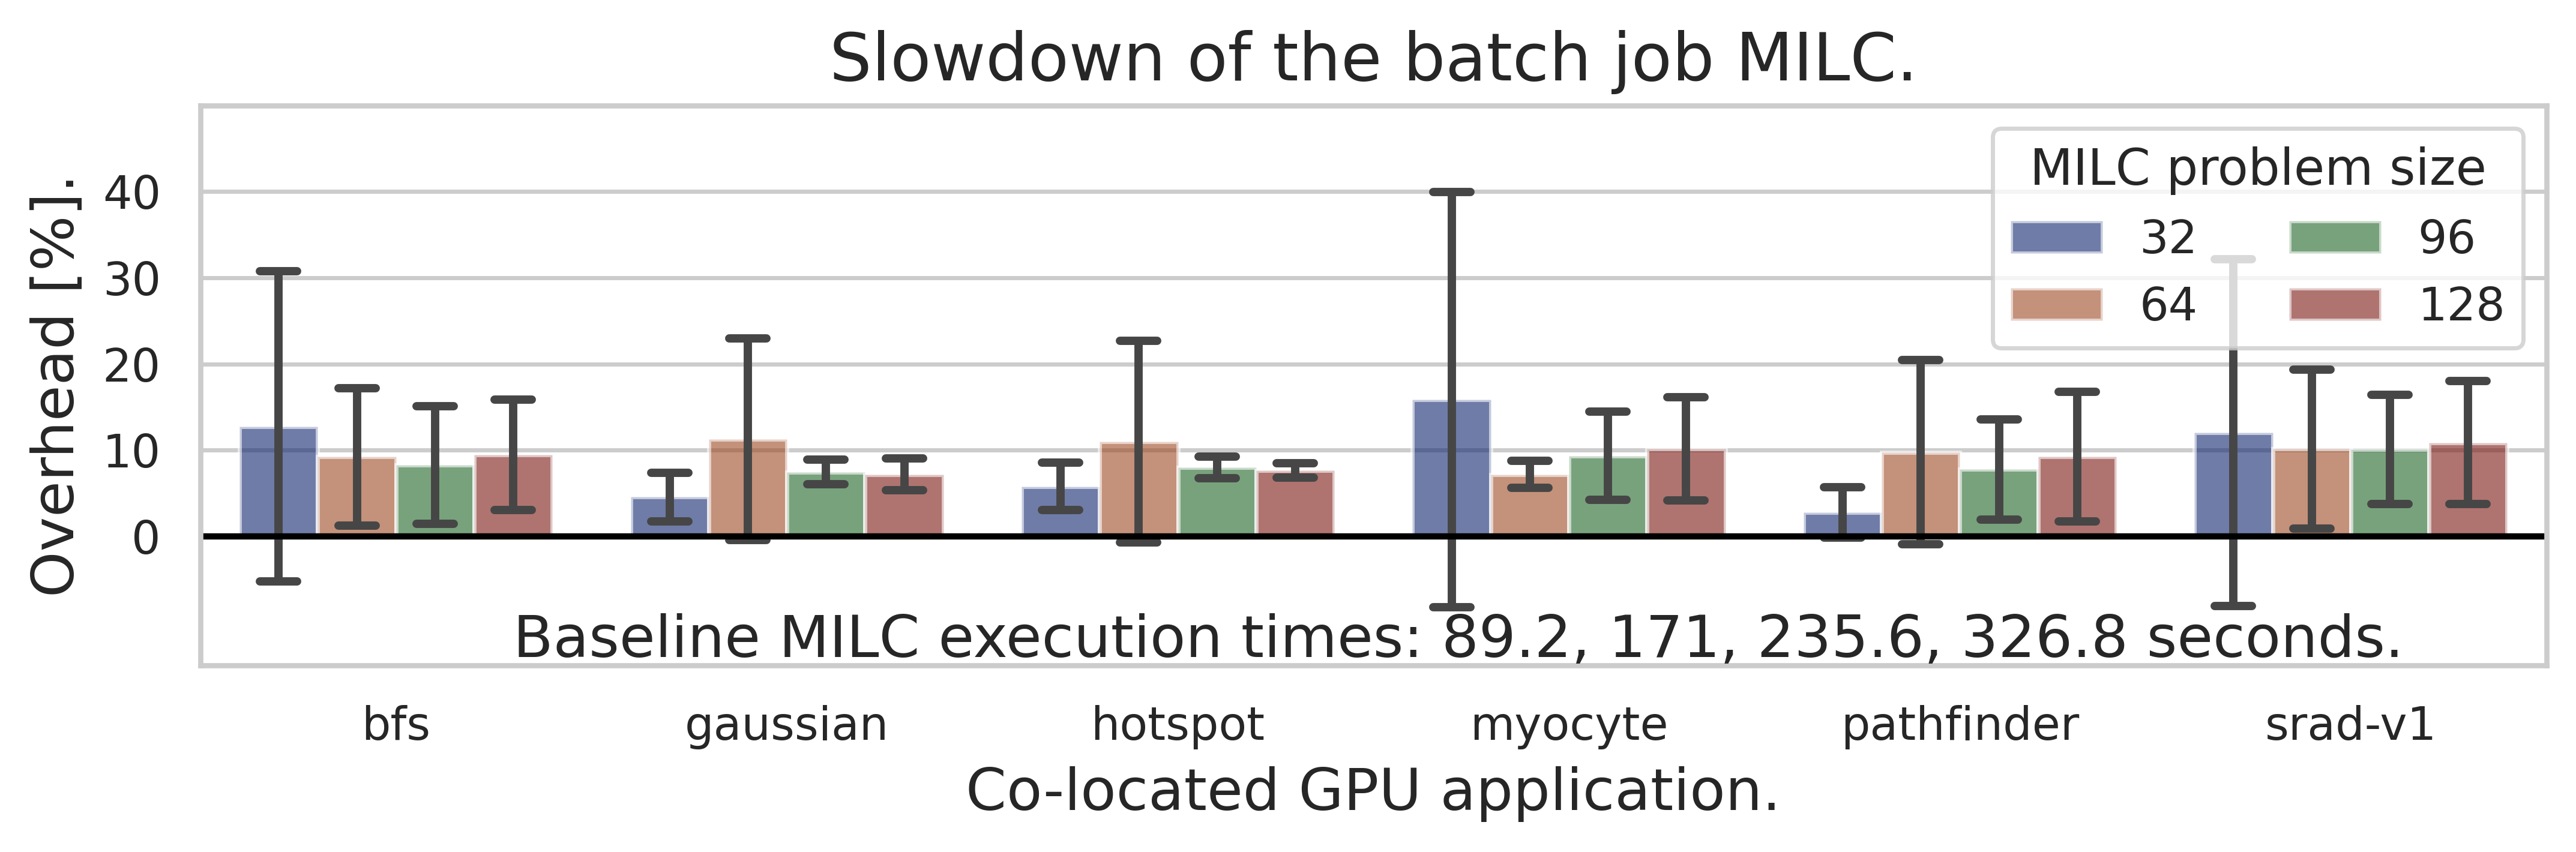

In [13]:

sns.set_style("whitegrid")
fig = plt.figure(figsize=(9,3))
ax = fig.gca()
#g = sns.barplot(
#    data=df5,
#    x="app", y="slowdown", hue="lulesh_size",
#    ci="sd", palette="dark", alpha=.6, #size=.5,#height=6,
#    ax=ax
#)

g = barplot_err(y="rescaled_slowdown", x="app", yerr="rescaled_slowdown_dev", hue="lulesh_size",
                data=df5,palette="dark", alpha=.6, capsize=0.1)
g.set_xlabel('Co-located GPU application.',fontsize=14)
g.set_ylabel('Overhead [%].',fontsize=14)
g.set_title('Slowdown of the batch job MILC.',fontsize=16)
g.legend(title='MILC problem size', ncol=2, loc='upper right')
g.axhline(y=0, color='black', linestyle='-')
g.set_yticks([0,10,20,30,40])
g.set_ylim([-15,50])
g.set_xlim([-0.5,5.5])

plt.annotate("Baseline MILC execution times: 89.2, 171, 235.6, 326.8 seconds.",
             #r'Free memory in $\bf{allocated}$'+'\n'+r'and $\bf{idle}$ nodes.',
             xy=(1, -2),  #xycoords='data',
            xytext=(0.3, -14), fontsize=14,
    #textcoords='axes fraction',
            #arrowprops=dict(facecolor='black', shrink=0.05)#,horizontalalignment='right'
    #        , verticalalignment='top',
)


plt.rcParams['figure.dpi'] = 500
plt.tight_layout()

plt.savefig(os.path.join('plots', "gpu", "colocation_gpu_milc.pdf"),bbox_inches='tight',pad_inches = 0, transparent=False)


In [14]:
df5

,app,lulesh_size,time,original_time,slowdown,original_dev,dev,slowdown_dev,app_slowdown,app_slowdown_dev,rescaled_slowdown,rescaled_app_slowdown,rescaled_slowdown_dev,rescaled_app_slowdown_dev
0,bfs,32,100.569011,89.199564,1.127461,2.270352,15.854707,0.180046,1.114786,0.022088,12.746080,11.478624,18.004585,2.208813
1,gaussian,32,93.263840,89.199564,1.045564,2.270352,0.855101,0.028286,0.960754,0.079284,4.556386,-3.924611,2.828619,7.928413
2,hotspot,32,94.371688,89.199564,1.057984,2.270352,0.592881,0.027736,1.074365,0.040985,5.798373,7.436463,2.773650,4.098540
3,myocyte,32,103.360674,89.199564,1.158758,2.270352,21.324298,0.240875,0.998550,0.019324,15.875762,-0.144981,24.087523,1.932406
4,pathfinder,32,91.655815,89.199564,1.027537,2.270352,1.166399,0.029240,1.066393,0.035584,2.753658,6.639287,2.924018,3.558379
5,srad-v1,32,99.938833,89.199564,1.120396,2.270352,17.767184,0.201216,1.002247,0.056616,12.039599,0.224740,20.121565,5.661580
6,bfs,64,186.770035,171.004849,1.092191,2.339331,13.371952,0.079611,1.254693,1.879683,9.219145,25.469291,7.961095,187.968343
7,gaussian,64,190.261859,171.004849,1.112611,2.339331,19.794209,0.116749,1.816482,13.133674,11.261090,81.648182,11.674871,1313.367352
8,hotspot,64,189.770293,171.004849,1.109736,2.339331,19.863122,0.117143,1.104407,0.031096,10.973633,10.440688,11.714317,3.109581
9,myocyte,64,183.295014,171.004849,1.071870,2.339331,0.840613,0.015465,1.019957,0.018099,7.187027,1.995722,1.546514,1.809876
